## Assignment 3
## Gowri Govindaraj

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

for a,b in zip(x,y):
    c = complex(a,b)

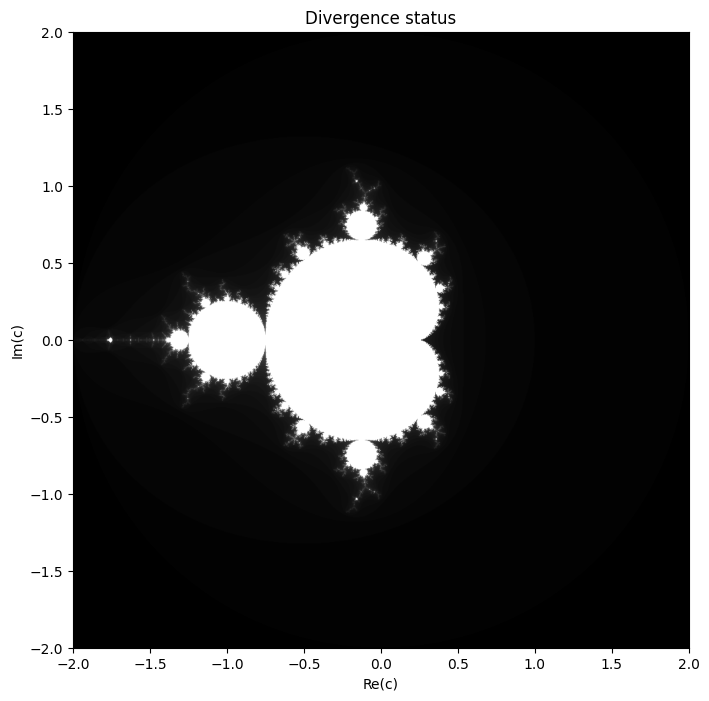

<Figure size 640x480 with 0 Axes>

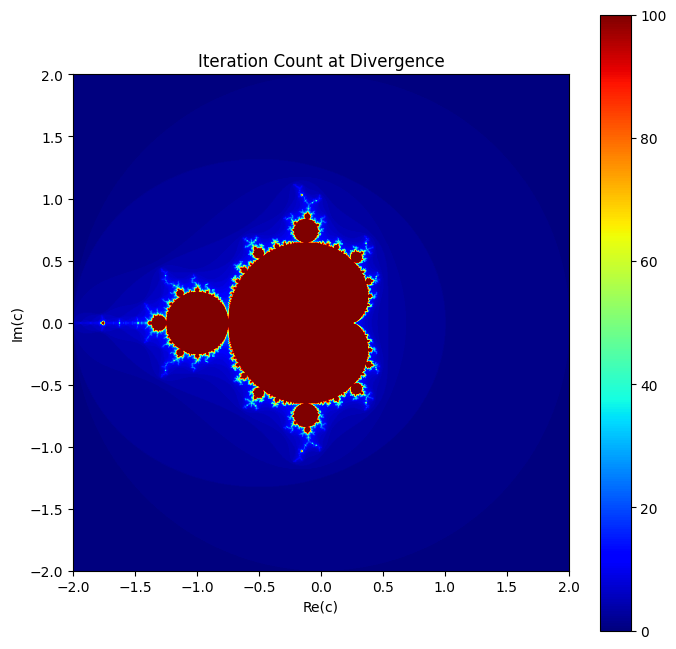

<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from q1 import iter_method

# define the range of c values
x_range = np.linspace(-2, 2, 1000)
y_range = np.linspace(-2, 2, 1000)
xx, yy = np.meshgrid(x_range, y_range)
c = xx + yy*1j

#Using the iteration function
z = np.vectorize(iter_method)(c)

#Image
plt.figure(figsize=(8,8))
plt.imshow(z, cmap='gray', extent=[-2, 2, -2, 2])
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.title('Divergence status')
plt.show()
plt.savefig('a1.png')

#Image with vals
plt.figure(figsize=(8,8))
plt.imshow(z, cmap='jet', extent=[-2, 2, -2, 2])
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.title('Iteration Count at Divergence')
plt.colorbar()
plt.show()
plt.savefig('a2.png')


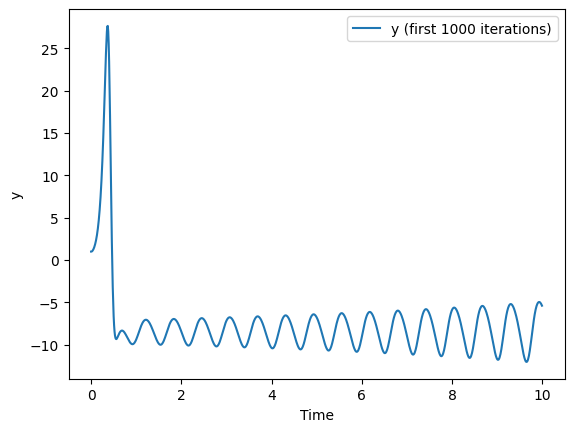

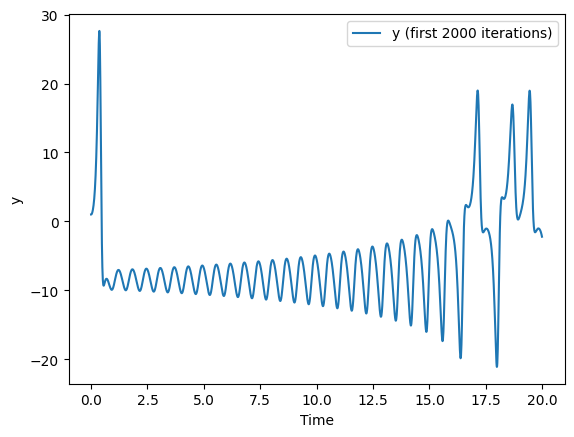

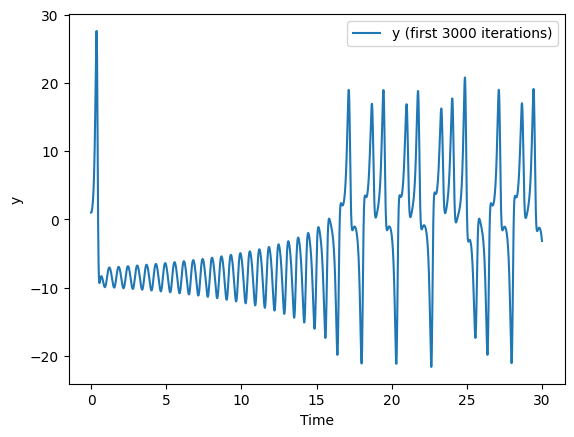

Text(0.5, 1.0, 'Semilog plot')

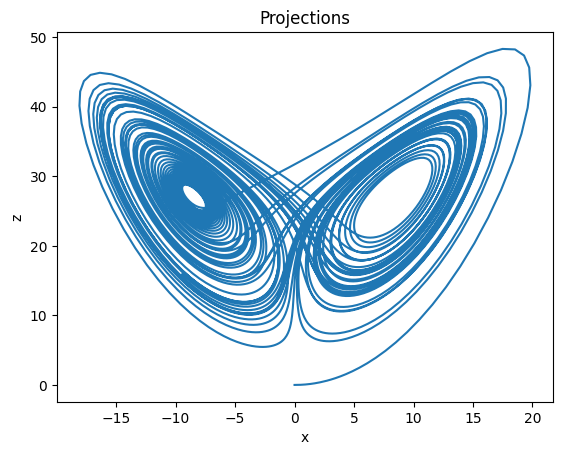

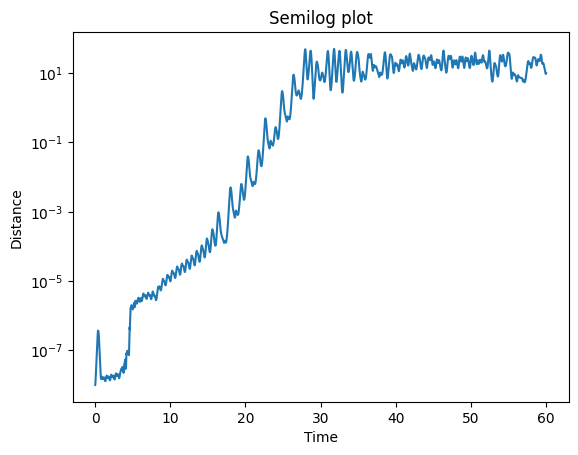

In [137]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def lorenz_eqs(W, t, σ, r, b):
    """
    The Lorenz equations, which model the behavior of Earth's atmosphere.

    Parameters
    ----------
    W : array_like
        The three variables [X, Y, Z].
    t : float
        The current time.
    σ : float
        The Prandtl number (the ratio of the kinematic viscosity to the thermal diffusivity).
    r : float
        The Rayleigh number (which depends on the vertical temperature difference between the top and bottom of the atmosphere).
    b : float
        A dimensionless length scale.

    Returns
    -------
    dWdt : ndarray, shape (3,)
        The time derivatives of [X, Y, Z].
    """
    X, Y, Z = W
    dXdt = -σ*(X - Y)
    dYdt = r*X - Y - X*Z
    dZdt = -b*Z + X*Y
    return np.array([dXdt, dYdt, dZdt])

# Initial conditions and parameters
W0 = [0., 1., 0.]
params = [10., 28, 8./3.]
tmax = 60.
dt = 0.01

# Solve the equations using odeint
t = np.arange(0, tmax+dt, dt)
sol = odeint(lorenz_eqs, W0, t, args=tuple(params))

# Plot y as a function of time for the first 1000, 2000, and 3000 iterations
plt.figure()
plt.plot(t[:1000], sol[:1000, 1], label='y (first 1000 iterations)')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()
plt.plot(t[:2000], sol[:2000, 1], label='y (first 2000 iterations)')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()
plt.plot(t[:3000], sol[:3000, 1], label='y (first 3000 iterations)')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()


# Reproduce Lorenz' Figure 2
fig, ax = plt.subplots()
ax.plot(sol[:, 0], sol[:, 2])
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_title('Projections')

# Find the solution with slightly different initial conditions
W0_new = [0., 1.00000001, 0.]
sol_new = odeint(lorenz_eqs, W0_new, t, args=tuple(params))

# Calculate the distance between the two solutions and plot it on a semilog plot
distance = np.sqrt(np.sum((sol - sol_new)**2, axis=1))
fig, ax = plt.subplots()
ax.semilogy(t, distance)
ax.set_xlabel('Time')
ax.set_ylabel('Distance')
ax.set_title('Semilog plot')
